In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [35]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Processed"

#casein session
animal="VGP509"
day="039"
day_meta='039'
date="20230420"



s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))
print(s2p_folder)

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='reduced_metafile')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[2] == day_meta: 
        events_file=folder+row[5]

C1 = assemble_data(s2p_folder,events_file,animal="VGP202", diet="NR", solution="Casein")



#Maltodextrin session
animal='VGP509'
day='036'
day_meta='036'
date='20230417'
s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

for row in rows: 
    if row[0]== animal and row[2] == day_meta: 
        events_file=folder+row[5]



M1 = assemble_data(s2p_folder,events_file,animal="VGP202", diet="NR", solution="Malt")

C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\VGP2\Processed\s2p\sub-VGP509\ses-039
File is excel file. Making csv metafile first


In [105]:
C1['df_responsive']

,responsive,activated,inhibited
pump_all,5,2,3
lick_all,13,9,4
pump_only,2,1,3
lick_only,10,8,4
both,3,1,0
neither,17,22,25


In [37]:
M1['df_responsive']

,responsive,activated,inhibited
pump_all,7,2,5
lick_all,13,7,6
pump_only,4,2,5
lick_only,10,7,6
both,3,0,0
neither,19,27,25


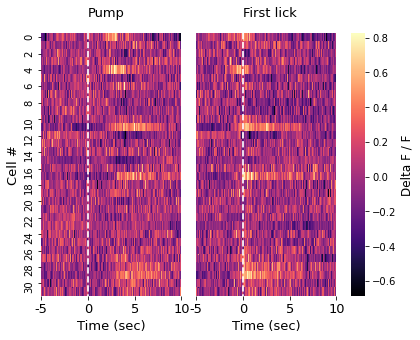

In [214]:
# heatplot to show pump and lick 

f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.15, left=0.1, right=0.85)



y1 = np.mean(C1["pump_snips_all"], axis=1)
y2 = np.mean(C1["lick_snips_all"], axis=1)

sns.heatmap(y1, ax = ax[0],cbar=False,cmap="magma")
sns.heatmap(y2, ax = ax[1], cbar_ax=ax[2],cmap="magma")

ax[0].text(50,-2, "Pump", size=13)
ax[0].vlines([50],0,77, color="white", linestyle="--",lw=1.7)

ax[1].text(50,-2, "First lick", size=13)
ax[1].vlines([50],0,77, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)
ax[1].set_yticks([])

ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells.png")

In [108]:
print(len(C1['pump_responsive']))
C1['df_responsive']

32


,responsive,activated,inhibited
pump_all,5,2,3
lick_all,13,9,4
pump_only,2,1,3
lick_only,10,8,4
both,3,1,0
neither,17,22,25


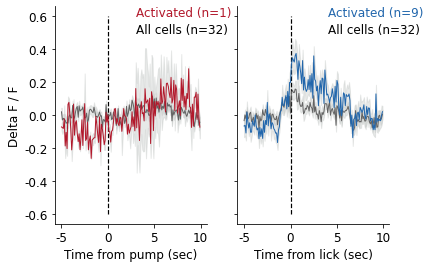

In [118]:
# shaded error plots to show activation Casein 1

f, ax = plt.subplots(ncols=2, sharey=True)

y1 = np.mean(C1["pump_snips_all"], axis=1)
y1_resp = np.mean(C1["pump_snips_all"][np.where(C1["pump_responsive"] == 1)], axis=1)

ax[0].text(80, 0.5, "All cells (n=32)", size=12)
ax[0].text(80, 0.6, "Activated (n=1)", color="#b2182b",size=12)

ax[0].vlines([50],-0.6,0.6, color="black", linestyle="--", linewidth=1.2)

tp.shadedError(ax[0], y1, linecolor="#636363")
tp.shadedError(ax[0], y1_resp, linecolor="#b2182b")

y2 = np.mean(C1["lick_snips_all"], axis=1)
y2_resp = np.mean(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)], axis=1)

tp.shadedError(ax[1], y2, linecolor="#636363")
tp.shadedError(ax[1], y2_resp, linecolor="#2166ac")

ax[1].text(90, 0.5, "All cells (n=32)",size=12)
ax[1].text(90, 0.6, "Activated (n=9)", color="#2166ac",size=12)

ax[1].vlines([50],-0.6,0.6, color="black", linestyle="--",linewidth=1.2)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=12)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    
ax[0].set_xlabel("Time from pump (sec)", size=12)
ax[1].set_xlabel("Time from lick (sec)", size=12)

ax[0].set_ylabel("Delta F / F", size=12)
ax[0].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[1].set_yticks([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6])
ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0, 0.2,0.4,0.6], size=12)

f.savefig("..//output//shadederror.png")

In [119]:
print('Total number of cells',len(C1['lick_responsive']))

C1["df_responsive"].activated


Total number of cells 32


pump_all      2
lick_all      9
pump_only     1
lick_only     8
both          1
neither      22
Name: activated, dtype: int64

In [120]:
C1["df_responsive"].activated[2:6]

pump_only     1
lick_only     8
both          1
neither      22
Name: activated, dtype: int64

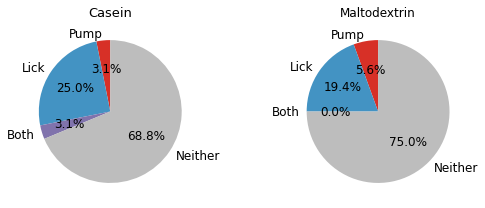

In [153]:
# make pie chart showing activated cells

pie_colors = ['#d73027','#4393c3','#8073ac','#bdbdbd']
labels = ['Pump','Lick','Both','Neither']

f, [ax1, ax2] = plt.subplots(figsize=(8,4), ncols=2, gridspec_kw={"wspace":0.5})

ax1.pie(C1["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 12})

ax2.pie(M1["df_responsive"].activated[2:6], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 12})

ax1.set_title("Casein", size=13)
ax2.set_title("Maltodextrin")

f.savefig("..//output//pies_activated.png")

In [141]:
plt.pie?

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A se

In [117]:
np.shape(C1["pump_snips_all"])
np.shape(C1["lick_snips_all"][np.where(C1["lick_responsive"] == 1)])

(5, 29, 150)

In [11]:
s = assemble_data(s2p_folder,events_file)

In [12]:
get_number_cells

<function __main__.get_number_cells(s2p_folder)>

In [13]:
s = assemble_data(s2p_folder,events_file)
np.shape(s)

()

In [14]:
s.keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'df_responsive'])

In [15]:
np.shape(s["lick_snips_all"])

(23, 16, 150)

In [16]:
l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]
l.shape

(7, 16, 150)

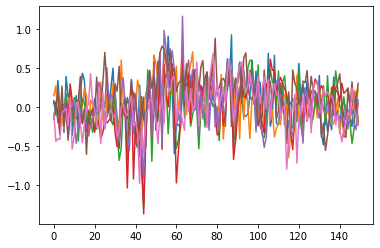

In [17]:
plt.plot(np.mean(l, axis=1).T);

NameError: name 'cas' is not defined

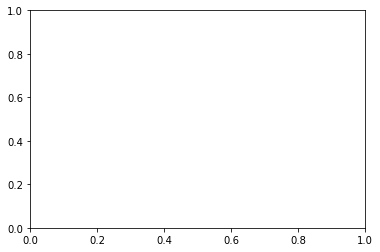

In [18]:
import trompy as tp

f, ax = plt.subplots()

for sol in [cas, malt]:
    s = sol
    l = s["lick_snips_all"][np.where(s["lick_responsive"] == 1)]
    p = s["pump_snips_all"][np.where(s["pump_responsive"] == -1)]

    y = np.mean(l, axis=1)

    tp.shadedError(ax, y)

In [ ]:
import seaborn as sns

f, ax = plt.subplots(ncols=2)

for sol, axis in zip([cas, malt], ax):
    y = np.mean(sol["lick_snips_all"], axis=1)
    sns.heatmap(y, ax = axis)

In [ ]:
# pie chart for activated cells 
sizes_a = [n_pump_a_only, n_lick_a_only, n_both_a, n_non_a]
sizes_i = [n_pump_i_only, n_lick_i_only, n_both_i, n_non_i]
sizes_r = [n_pump_r, n_lick_r, n_both_r, n_non_r]
labels = 'Pump','Lick','Both','Neither'

f1, ax1 = plt.subplots()
ax1.pie(sizes_a, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=['green','red','yellow','dimgrey'])

In [ ]:
def get_ncells_overlap(cond1, cond2):
    
    n_both = sum(np.logical_and(cond1, cond2))
    n_neither = sum(~np.logical_or(cond1, cond2))
    n_cond1 = int(sum(cond1) - n_both)
    n_cond2 = int(sum(cond2) - n_both)

    return (n_cond1, n_cond2, n_both, n_neither)

s = cas

# responsive cells
pump_r = abs(s["pump_responsive"])
lick_r = abs(s["lick_responsive"])

# activated cells
pump_a = s["pump_responsive"] == 1
lick_a = s["lick_responsive"] == 1

# inhibited cells
pump_i = s["pump_responsive"] == -1
lick_i = s["lick_responsive"] == -1

import pandas as pd
return pd.DataFrame([get_ncells_overlap(pump_r, lick_r),
                   get_ncells_overlap(pump_a, lick_a),
                   get_ncells_overlap(pump_i, lick_i)],
                  columns=["pump", "lick", "both", "neither"],
                  index=["responsive", "activated", "inhibited"]).T

pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'


f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)

ax1.pie(get_ncells_overlap(pump_r, lick_r), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax2.pie(get_ncells_overlap(pump_a, lick_a), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);

ax3.pie(get_ncells_overlap(pump_i, lick_i), labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);



In [ ]:
df

In [ ]:
f, ax = plt.subplots()

pie_colors = ['green','red','yellow','dimgrey']

pump_r = abs(cas["pump_responsive"])
lick_r = abs(cas["lick_responsive"])
cas_bars = get_ncells_overlap(pump_r, lick_r)

pump_r = abs(malt["pump_responsive"])
lick_r = abs(malt["lick_responsive"])
malt_bars = get_ncells_overlap(pump_r, lick_r)

bottom=[0, 0]
for i, bars_c, bars_m in zip(range(4), cas_bars, malt_bars):
    ax.bar(1, bars_c, bottom=bottom[0], color=pie_colors[i])
    ax.bar(2, bars_m, bottom=bottom[1], color=pie_colors[i])
    
    bottom[0] += bars_c
    bottom[1] += bars_m
    
    print(i, bottom)
    

In [ ]:
pump_a = s["pump_responsive"] == 1
pump_a

In [ ]:
np.logical_or(c3, c4)
~np.logical_or(c1, c2)

In [ ]:
n_non_r + n_both_r + n_lickonly_r + n_pumponly_r

In [ ]:
int(sum(abs(s["lick_responsive"]) * abs(s["pump_responsive"])))


In [ ]:
pie_colors = ['green','red','yellow','dimgrey']
labels = 'Pump','Lick','Both','Neither'

sizes_r = [n_pump_r, n_lick_r, n_both_r, n_neither_r]
sizes_a = [n_pump_a, n_lick_a, n_both_a, n_neither_a]
sizes_i = [n_pump_i, n_lick_i, n_both_i, n_neither_i]

f, [ax1, ax2, ax3]  = plt.subplots(ncols=3)
ax1.pie(sizes_r, labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors);


In [ ]:
np.count_nonzero(s["lick_responsive"] == 1)

In [ ]:
cas = assemble_data(s2p_folder,events_file)
malt = assemble_data(s2p_folder,events_file)

In [ ]:
METAFILE = "..\\data\\"